In [1]:
import os
import sys

import pandas as pd
import math
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
import numpy as np
import aplpy
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy import units as u
from math import sqrt

In [2]:

filename_original='NGC6334-V.txt'
col_names=['RA', 'DEC', 'Sum', 'a', 'b', 'P.A.', 'sum error', 'a_error', 'b_error', 'PA_error', 'Peak Intensity']

starts=np.array([6,31,57, 82, 107, 132, 157, 182, 207, 232, 258])
ends=np.hstack((starts[1:],280))
widths=ends-starts

table1_original=pd.read_fwf(filename_original, names=col_names, widths=widths)
table1_original = table1_original.iloc[0:] 
table1_original.tail()

,RA,DEC,Sum,a,b,P.A.,sum error,a_error,b_error,PA_error,Peak Intensity
23,259.989366,-35.965945,0.042590,4.084,1.212,16.63,0.000457,0.04581,0.01369,0.41,NaN
24,259.988614,-35.966136,0.032181,2.375,1.536,-1.06,0.000394,0.03052,0.01977,0.17,NaN
25,259.986102,-35.966166,0.045976,3.006,1.602,10.04,0.000460,0.03176,0.01697,1.01,NaN
26,259.992229,-35.960603,0.097827,3.947,2.740,9.15,0.000678,0.02866,0.01944,2.61,NaN
27,259.987593,-35.968645,0.143976,4.391,2.649,43.69,0.000797,0.02898,0.01737,4.05,NaN


In [3]:
ra=table1_original['RA']
ra=np.array(ra)
ra=[float(ra) for ra in ra]
#ra=np.round(ra, 4)
#ra=np.sort(ra)

#print (ra)
#print (len(ra))
##########################################################
dec=table1_original['DEC']
dec=np.array(dec)
dec=[float(dec) for dec in dec]
#dec=np.round(dec, 4)
#############################################################
aperture_sum=table1_original['Sum']
aperture_sum=np.array(aperture_sum)
aperture_sum=[float(aperture_sum) for aperture_sum in aperture_sum]
####################################################################

In [4]:
mass_est = [11.003,  0.483,  1.236,  3.349, 19.218, 20.249,  4.727,  7.713,  2.915, 16.291 , 25.131,  7.352, 54.074,  2.651, 35.457,  2.249,  0.286,  1.115,  3.339 , 0.331, 79.903, 8.75,   0.614,  2.321,  1.753,  2.505,  5.33,   7.845]
mass_rot =  [ 6.738,  0.19,   0.25,   1.313, 12.141, 11.322,  2.719, 10.373,  1.755,  8.835, 7.948,  1.764, 30.847,  0.29,  13.903,  1.134,  0.067,  1.225,  1.727,  0.396, 18.645,  2.368,  0.092,  0.41,   0.175,  1.013,  2.615,  4.047]

In [5]:
# Calculating the center of mass in 2D ra and DEC
#calculated as the mass-weighted average of the positions of the particles.

#For a two-dimensional system, we calculate the center of mass in each dimension separately. 
#If we have x and y coordinates, the CM for each dimension is:
#CMx = (Σ mi * xi) / Σ mi
#CMy = (Σ mi * yi) / Σ mi

#---------------------------------------------------
#---------------------------------------------------
num_ra_rot=[]

for i in range(len(ra)):
    num_ra_rot.append(ra[i]*mass_rot[i])
    

cm_ra_rot=(sum(num_ra_rot))/(sum(mass_rot))
print('Center of mass_rot , ra=',cm_ra_rot) 


num_dec_rot=[]

for i in range(len(dec)):    
    num_dec_rot.append(dec[i]*mass_rot[i])
    
cm_dec_rot=(sum(num_dec_rot))/(sum(mass_rot))

print('Center of mass_rot , dec=',cm_dec_rot)


#---------------------------------------------------
#---------------------------------------------------


num_ra=[]

for i in range(len(ra)):
    num_ra.append(ra[i]*mass_est[i])
    

cm_ra=(sum(num_ra))/(sum(mass_est))
print('Center of mass_est , ra=',cm_ra) 


num_dec=[]

for i in range(len(dec)):    
    num_dec.append(dec[i]*mass_est[i])
    
cm_dec=(sum(num_dec))/(sum(mass_est))

print('Center of mass_est , dec=', cm_dec)




Center of mass_rot , ra= 259.9881290057685
Center of mass_rot , dec= -35.96363883809929
Center of mass_est , ra= 259.9887792028854
Center of mass_est , dec= -35.96387922478652


In [6]:
# geometrical center

ra_gc=np.mean(ra)
dec_gc=np.mean(dec)

print(ra_gc) 
print (dec_gc)



259.9876323884522
-35.96350992936927


In [7]:
# The most massive core in the center


print(mass_rot[12])

ra_c_rot=ra[20] #most massive core
dec_c_rot=dec[20]

print(ra_c_rot)
print(dec_c_rot)

#---------------------------------------------------
#---------------------------------------------------

print(mass_est[20])

ra_c=ra[20] #most massive core
dec_c=dec[20]

print(ra_c)
print(dec_c)




30.847
259.9908408985441
-35.96458071287718
79.903
259.9908408985441
-35.96458071287718


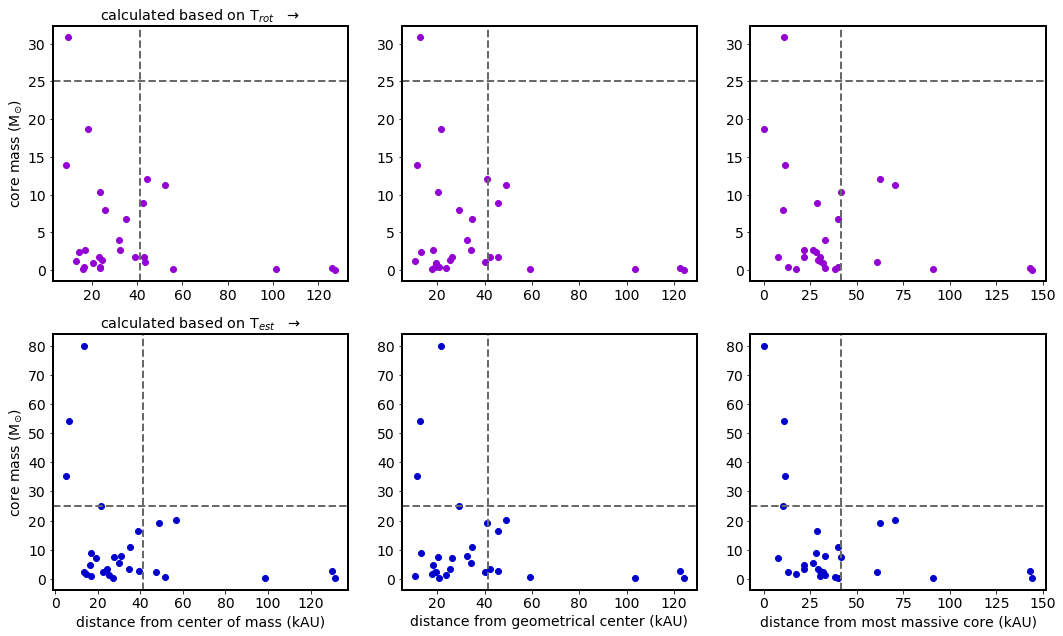

In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=14
plt.rcParams['axes.labelsize']=14
plt.rcParams['lines.markersize']=6
plt.rcParams['lines.linewidth']=2
plt.rcParams['figure.subplot.wspace']=0.2
plt.rcParams['figure.subplot.hspace']=0.3



def calculate_distance(ra1, dec1, ra2, dec2):
    ra1, dec1 = np.array(ra1), np.array(dec1)  # conversion to numpy arrays
    return np.sqrt((ra1 - ra2) ** 2 + (dec1 - dec2) ** 2)

d_cof = calculate_distance(ra, dec, cm_ra, cm_dec)
d_gc = calculate_distance(ra, dec, ra_gc, dec_gc)
d_mmc = calculate_distance(ra, dec, ra_c, dec_c)


d_cof_rot = calculate_distance(ra, dec, cm_ra_rot, cm_dec_rot)
d_mmc_rot = calculate_distance(ra, dec, ra_c_rot, dec_c_rot)

d_in_arcsec = d_gc * 3600
D = 1760

d_in_AU = d_in_arcsec * D
d_in_kAU = d_in_AU / 1000

#print(max(d_in_kAU))
#print(mass_est)

mass_threshold = 25  # Mass threshold
distance_threshold = max(d_in_kAU) / 3  # Distance threshold

fig, axs = plt.subplots(2, 3, figsize=(15, 9))

d_in_arcsec_cof_rot = d_cof_rot * 3600
d_in_arcsec_mmc_rot = d_mmc_rot * 3600
d_in_arcsec_cof = d_cof * 3600
d_in_arcsec_gc = d_gc * 3600
d_in_arcsec_mmc = d_mmc * 3600

d_in_AU_cof_rot = d_in_arcsec_cof_rot * D
d_in_AU_mmc_rot = d_in_arcsec_mmc_rot * D
d_in_AU_cof = d_in_arcsec_cof * D
d_in_AU_gc = d_in_arcsec_gc * D
d_in_AU_mmc = d_in_arcsec_mmc * D

d_in_kAU_cof_rot = d_in_AU_cof_rot / 1000
d_in_kAU_mmc_rot = d_in_AU_mmc_rot / 1000
d_in_kAU_cof = d_in_AU_cof / 1000
d_in_kAU_gc = d_in_AU_gc / 1000
d_in_kAU_mmc = d_in_AU_mmc / 1000


axs[0,0].plot(d_in_kAU_cof_rot, mass_rot, 'o',color='darkviolet')
axs[0,0].axhline(y=mass_threshold, color='dimgray', linestyle='--')
axs[0,0].axvline(x=distance_threshold, color='dimgray', linestyle='--')
axs[0,0].set_title('calculated based on T$_{rot}$   \u2192')
axs[0,0].set_ylabel('core mass (M$_{\odot}$)')

axs[0,1].plot(d_in_kAU_gc, mass_rot, 'o',color='darkviolet')
axs[0,1].axhline(y=mass_threshold, color='dimgray', linestyle='--')
axs[0,1].axvline(x=distance_threshold, color='dimgray', linestyle='--')
#axs[0,1].set_title('distance from the geometrical center')

axs[0,2].plot(d_in_kAU_mmc_rot, mass_rot, 'o',color='darkviolet')
axs[0,2].axhline(y=mass_threshold, color='dimgray', linestyle='--')
axs[0,2].axvline(x=distance_threshold, color='dimgray', linestyle='--')
#axs[0,2].set_title('distance from the most massive core')

axs[1,0].plot(d_in_kAU_cof, mass_est, 'o',color='MediumBlue')
axs[1,0].axhline(y=mass_threshold, color='dimgray', linestyle='--')
axs[1,0].axvline(x=distance_threshold, color='dimgray', linestyle='--')
axs[1,0].set_xlabel('distance from center of mass (kAU)')
axs[1,0].set_ylabel('core mass (M$_{\odot}$)')
axs[1,0].set_title('calculated based on T$_{est}$   \u2192')

axs[1,1].plot(d_in_kAU_gc, mass_est, 'o',color='MediumBlue')
axs[1,1].axhline(y=mass_threshold, color='dimgray', linestyle='--')
axs[1,1].axvline(x=distance_threshold, color='dimgray', linestyle='--')
axs[1,1].set_xlabel('distance from geometrical center (kAU)')
#axs[1,1].set_title('d_gc')

axs[1,2].plot(d_in_kAU_mmc, mass_est, 'o',color='MediumBlue')
axs[1,2].axhline(y=mass_threshold, color='dimgray', linestyle='--')
axs[1,2].axvline(x=distance_threshold, color='dimgray', linestyle='--')
axs[1,2].set_xlabel('distance from most massive core (kAU)')
#axs[1,2].set_title('d_mmc')

plt.tight_layout()

os.system('rm -rf plots/MS_distfromCoF.pdf')
plt.savefig('plots/MS_distfromCoF.pdf',  bbox_inches='tight', dpi=300)
plt.savefig('plots/MS_distfromCoF.png',  bbox_inches='tight', dpi=300)

plt.show()

In [61]:
#in arcsec

def calculate_mean_offset(d1, d2, d3):
    diff12 = np.abs(d1 - d2)
    diff13 = np.abs(d1 - d3)
    diff23 = np.abs(d2 - d3)
    return np.mean([diff12, diff13, diff23])


mean_offset_cof = calculate_mean_offset(np.mean(d_cof), np.mean(d_gc), np.mean(d_mmc))
print("Mean offset for d_cof: ", mean_offset_cof)


Mean offset for d_cof:  0.0002614602515160393


In [63]:
# in AU

def calculate_mean_offset(d1, d2, d3, D=1760):
    diff12 = np.abs(d1 - d2) * 3600 * D  # convert to AU
    diff13 = np.abs(d1 - d3) * 3600 * D  # convert to AU
    diff23 = np.abs(d2 - d3) * 3600 * D  # convert to AU
    return np.mean([diff12, diff13, diff23])


mean_offset_cof_AU = calculate_mean_offset(np.mean(d_cof), np.mean(d_gc), np.mean(d_mmc))
print("Mean offset for d_cof in AU: ", mean_offset_cof_AU)

Mean offset for d_cof in AU:  1656.612153605625
